In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
!unzip /content/drive/MyDrive/TS_decomposition.zip

Archive:  /content/drive/MyDrive/TS_decomposition.zip
  inflating: GAZP_200101_240901.txt  
  inflating: LKOH_200101_240901.txt  
  inflating: MOEXOG_200101_240901.txt  
  inflating: SBER_200101_240901.txt  
  inflating: USD000000TOD_200101_240901.txt  


In [ ]:
os.listdir()

['.config',
 'SBER_200101_240901.txt',
 'GAZP_200101_240901.txt',
 'TS_decomposition.zip',
 'MOEXOG_200101_240901.txt',
 'USD000000TOD_200101_240901.txt',
 'LKOH_200101_240901.txt',
 'sample_data']

In [ ]:
for filename in tuple(filter(lambda x: x.find('.txt')>-1,os.listdir())):
  with open (filename) as f:
    print(f.readlines()[:2])

['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'USD000000TOD,D,200109,000000,61.3975,61.405,61.1075,61.27,842631000\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'LKOH,D,200103,000000,6203.5,6294,6185,6294,791658\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'MOEXOG,D,200103,000000,8789.86,8883.83,8788.59,8853.65,22093556077\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'SBER,D,200103,000000,255.97,258.19,253.7,255,35824160\n']
['<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n', 'GAZP,D,200103,000000,259.1,261.9,257.77,259,34326290\n']


In [ ]:
'<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>\n'.split(',')[2:5:2]

['<DATE>', '<OPEN>']

In [ ]:
l=[]
for filename in tuple(filter(lambda x: x.find('.txt')>-1,os.listdir())):
  with open (filename) as f:
    l+=[x.split(',')[2:5:2]+[filename[:4]] for x in f.readlines()[1:]]
pd.DataFrame(l)

,0,1,2
0,200109,61.3975,USD0
1,200110,61.2,USD0
2,200113,61.0425,USD0
3,200114,61.2925,USD0
4,200115,61.395,USD0
...,...,...,...
5695,240827,127.3,GAZP
5696,240828,124.34,GAZP
5697,240829,124.49,GAZP
5698,240830,130.88,GAZP


In [ ]:
l=[]
for filename in tuple(filter(lambda x: x.find('.txt')>-1,os.listdir())):
  with open (filename) as f:
    l+=[x.split(',')[2:5:2]+[filename[:4]] for x in f.readlines()[1:]]
df=pd.DataFrame(l,).pivot(index=0,columns=2,values=1)
df=df[df.columns[0:]].astype(float)
df.index=pd.to_datetime(df.index,format='%y%m%d')
df=df.reindex(pd.date_range(df.index[0],df.index[-1],freq='D')).ffill().bfill()
df.head(4)

2,GAZP,LKOH,MOEX,SBER,USD0
2020-01-03,259.10,6203.5,8789.86,255.97,61.3975
2020-01-04,259.10,6203.5,8789.86,255.97,61.3975
2020-01-05,259.10,6203.5,8789.86,255.97,61.3975
2020-01-06,258.91,6300.0,8872.88,254.75,61.3975


In [ ]:
filelist=tuple(filter(lambda x: x.find('.txt')>-1,os.listdir()))
df1=pd.DataFrame()
for filename in filelist:
  tmp=pd.read_csv(filename,usecols=[2,4],names=['DATE',filename[:4]],skiprows=1,parse_dates=[0],date_format='%y%m%d')
  df1=df1.join(tmp.set_index('DATE'),rsuffix='_',how='outer')
df1=df1.reindex(pd.date_range(df1.index[0],df1.index[-1],freq='D')).ffill().bfill()

<Axes: >

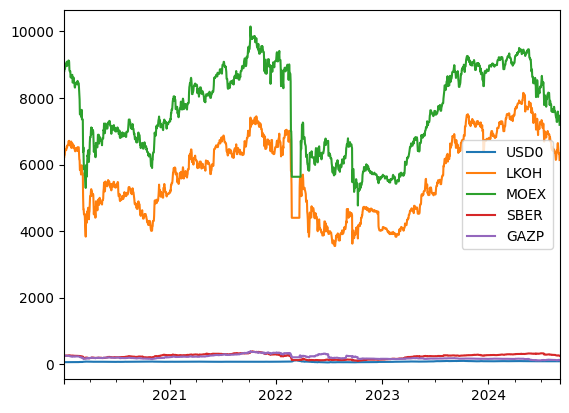

In [ ]:
df1.plot()

<Axes: >

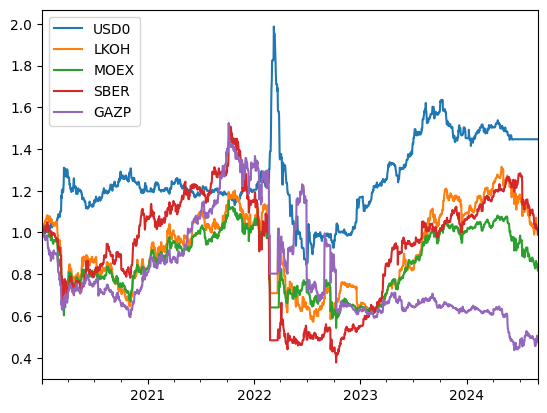

In [ ]:
(df1/df1.head(1).values).plot()

<Axes: >

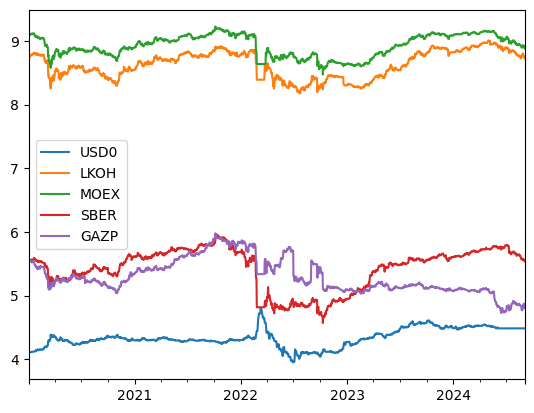

In [ ]:
df1.transform(np.log).plot()

<Axes: >

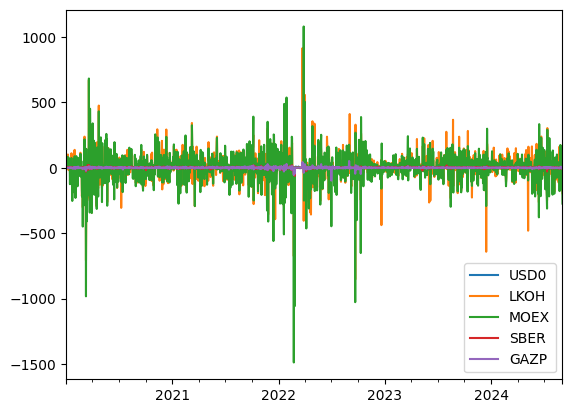

In [ ]:
df1.diff().plot()

<Axes: >

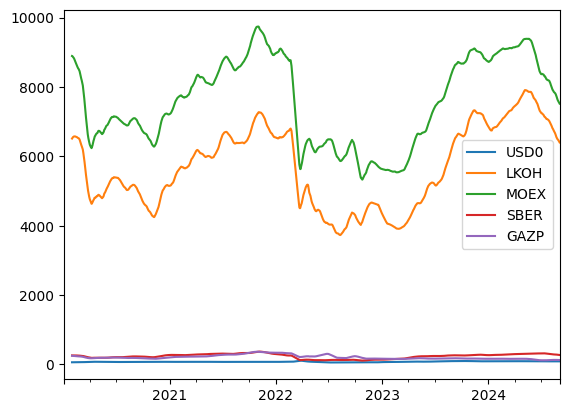

In [ ]:
df1.rolling(30).mean().plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
model=seasonal_decompose(df1.iloc[:,0])

array([<Axes: >, <Axes: >], dtype=object)

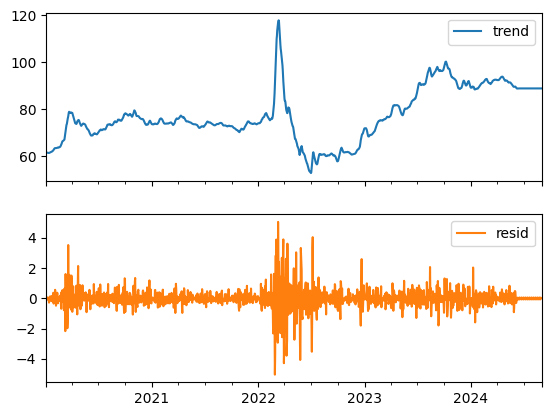

In [ ]:
pd.concat([model.trend,
model.resid],axis=1).plot(subplots=True)

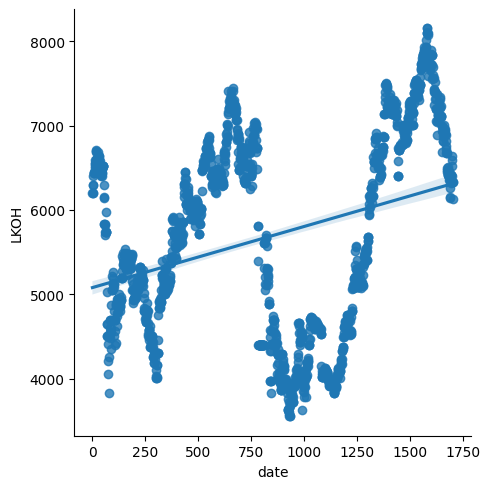

In [ ]:
sns.lmplot(df1.assign(date=range(df1.shape[0])),x='date',y='LKOH')

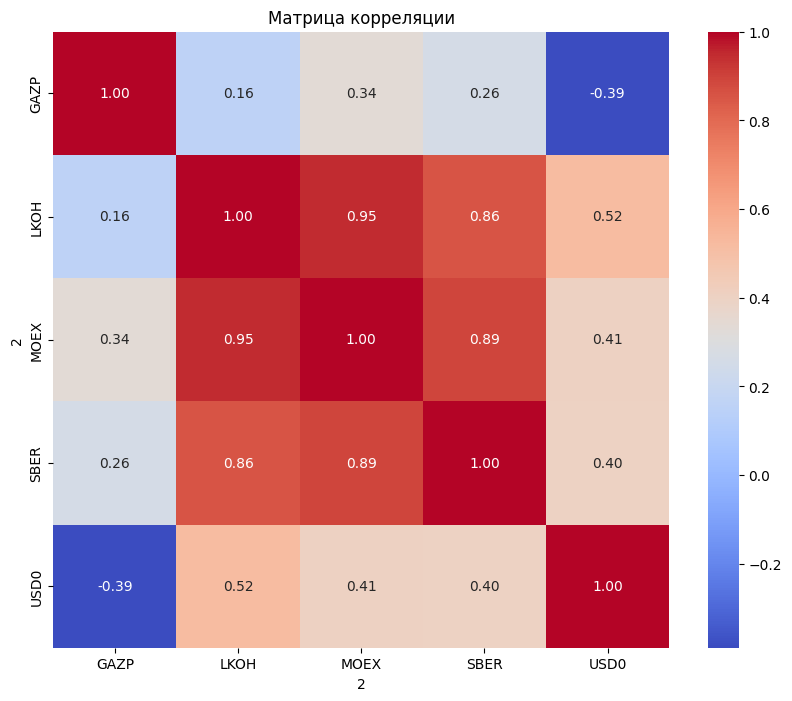

2             GAZP    LKOH     MOEX    SBER     USD0
2020-01-03  259.10  6203.5  8789.86  255.97  61.3975
2020-01-04  259.10  6203.5  8789.86  255.97  61.3975
2020-01-05  259.10  6203.5  8789.86  255.97  61.3975
2020-01-06  258.91  6300.0  8872.88  254.75  61.3975


In [ ]:
import matplotlib.pyplot as plt

# Вычисление корреляции
correlation_matrix = df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

# Вывод первых 4 строк DataFrame
print(df.head(4))

<Figure size 1200x1000 with 0 Axes>

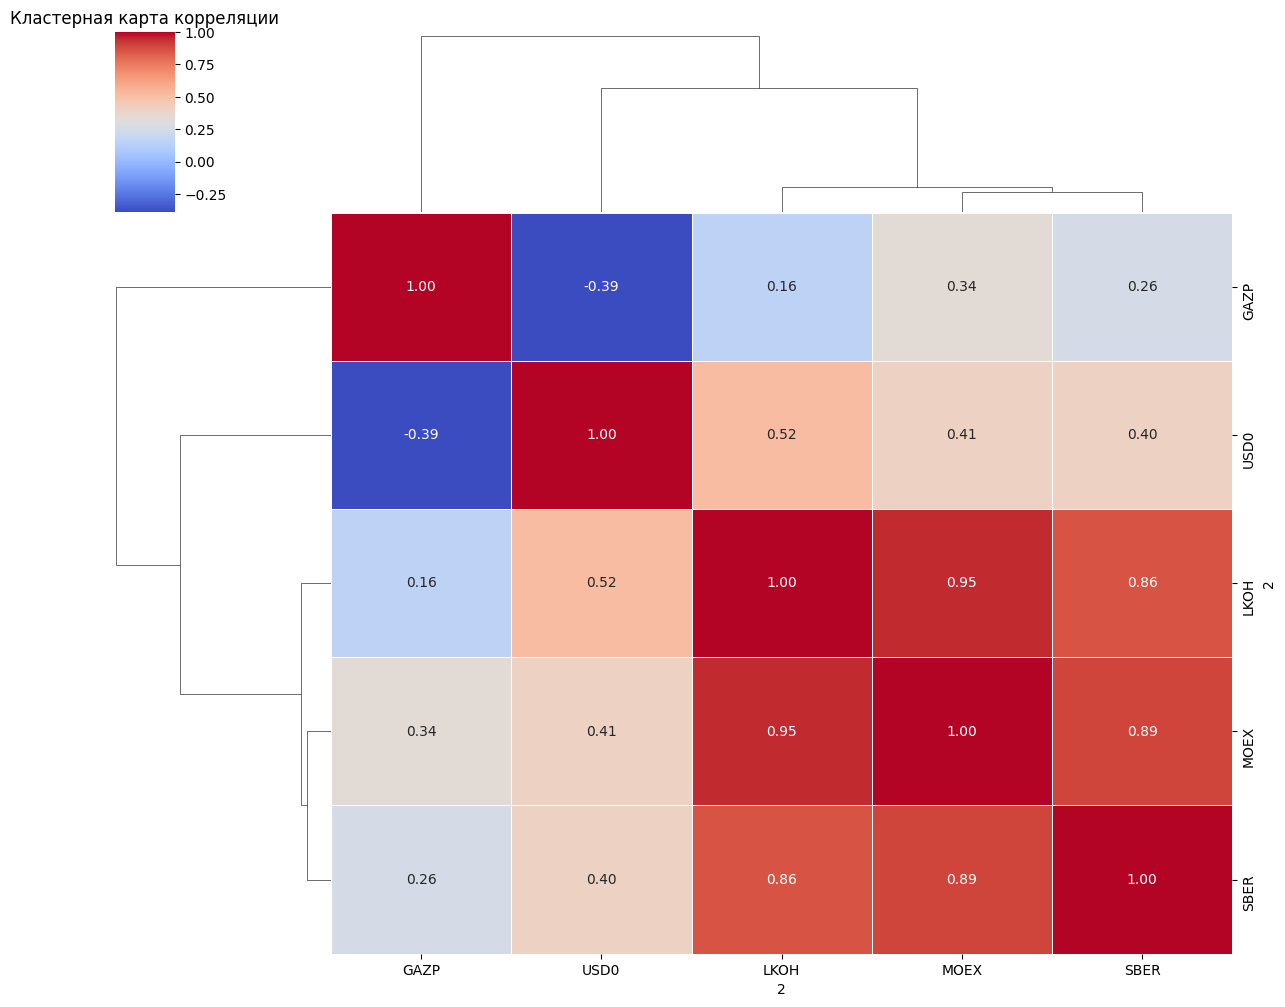

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Инициализация списка
l = []

# Сбор данных из файлов
for filename in tuple(filter(lambda x: x.find('.txt') > -1, os.listdir())):
    with open(filename) as f:
        l += [x.split(',')[2:5:2] + [filename[:4]] for x in f.readlines()[1:]]

# Создание DataFrame и поворот данных
df = pd.DataFrame(l).pivot(index=0, columns=2, values=1)

# Приведение данных к числовому формату
df = df[df.columns[0:]].astype(float)

# Установка индекса как даты
df.index = pd.to_datetime(df.index, format='%y%m%d')

# Заполнение пропусков
df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='D')).ffill().bfill()

# Вычисление корреляции
correlation_matrix = df.corr()

# Создание кластерной карты для матрицы корреляции
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix,
                method='average',
                cmap='coolwarm',
                linewidths=0.5,
                annot=True,
                fmt='.2f',
                figsize=(12, 10))
plt.title('Кластерная карта корреляции')
plt.show()
